In [30]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [31]:
%cd drive/MyDrive/Colab\ Notebooks/datasets/

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/datasets/'
/content/drive/MyDrive/Colab Notebooks/datasets


In [32]:
!ls

airline-passengers.csv


In [33]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams['figure.figsize'] = (15.0,7.0) #для графиков
plt.style.use('dark_background')


In [34]:
dataset = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')

In [ ]:
dataset

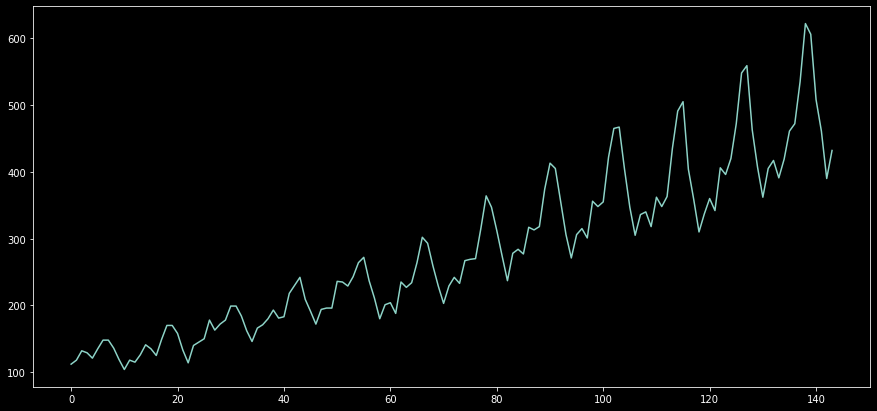

In [36]:
plt.plot(dataset)

#Используем Keras

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [38]:
tf.random.set_seed(33)

In [39]:
dataset = dataset.values

In [40]:
dataset = dataset.astype('float32')


In [ ]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
print(dataset)

In [ ]:
print(scaler.inverse_transform(dataset))

In [43]:
train_dataset, test_dataset = train_test_split(dataset,test_size=0.3,shuffle=False)

In [45]:
def make_data(dataset):
  dataX, dataY = [], []
  for i in range(len(dataset)-1):
    dataX.append(dataset[i])
    dataY.append(dataset[i+1])
  table = pd.DataFrame({'dataX':dataX,'dataY':dataY})
  dataX = np.asarray(dataX)
  dataY = np.asarray(dataY)
  return dataX,dataY,table



In [46]:
trainX,trainY,table1 =make_data(train_dataset)

In [47]:
testX,testY,table2=make_data(test_dataset)

In [48]:
table2

,dataX,dataY
0,[0.484556],[0.6138996]
1,[0.6138996],[0.6969112]
2,[0.6969112],[0.70077217]
3,[0.70077217],[0.57915056]
4,[0.57915056],[0.46911195]
5,[0.46911195],[0.38803086]
6,[0.38803086],[0.44787642]
7,[0.44787642],[0.45559844]
8,[0.45559844],[0.4131274]
9,[0.4131274],[0.4980695]


In [49]:
#создание и обучение нейронки
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX,trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
99/99 - 2s - loss: 0.0532 - 2s/epoch - 17ms/step
Epoch 2/100
99/99 - 0s - loss: 0.0264 - 144ms/epoch - 1ms/step
Epoch 3/100
99/99 - 0s - loss: 0.0195 - 149ms/epoch - 2ms/step
Epoch 4/100
99/99 - 0s - loss: 0.0179 - 145ms/epoch - 1ms/step
Epoch 5/100
99/99 - 0s - loss: 0.0170 - 147ms/epoch - 1ms/step
Epoch 6/100
99/99 - 0s - loss: 0.0158 - 146ms/epoch - 1ms/step
Epoch 7/100
99/99 - 0s - loss: 0.0148 - 141ms/epoch - 1ms/step
Epoch 8/100
99/99 - 0s - loss: 0.0139 - 157ms/epoch - 2ms/step
Epoch 9/100
99/99 - 0s - loss: 0.0129 - 142ms/epoch - 1ms/step
Epoch 10/100
99/99 - 0s - loss: 0.0116 - 155ms/epoch - 2ms/step
Epoch 11/100
99/99 - 0s - loss: 0.0105 - 142ms/epoch - 1ms/step
Epoch 12/100
99/99 - 0s - loss: 0.0094 - 146ms/epoch - 1ms/step
Epoch 13/100
99/99 - 0s - loss: 0.0084 - 141ms/epoch - 1ms/step
Epoch 14/100
99/99 - 0s - loss: 0.0073 - 161ms/epoch - 2ms/step
Epoch 15/100
99/99 - 0s - loss: 0.0064 - 148ms/epoch - 1ms/step
Epoch 16/100
99/99 - 0s - loss: 0.0056 - 153ms/epoc

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [56]:
trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.45 RMSE
Test Score: 49.32 RMSE


In [ ]:
print(np.hstack([trainY,trainPredict]))

In [ ]:
print(np.vstack([trainPredict,testPredict]))

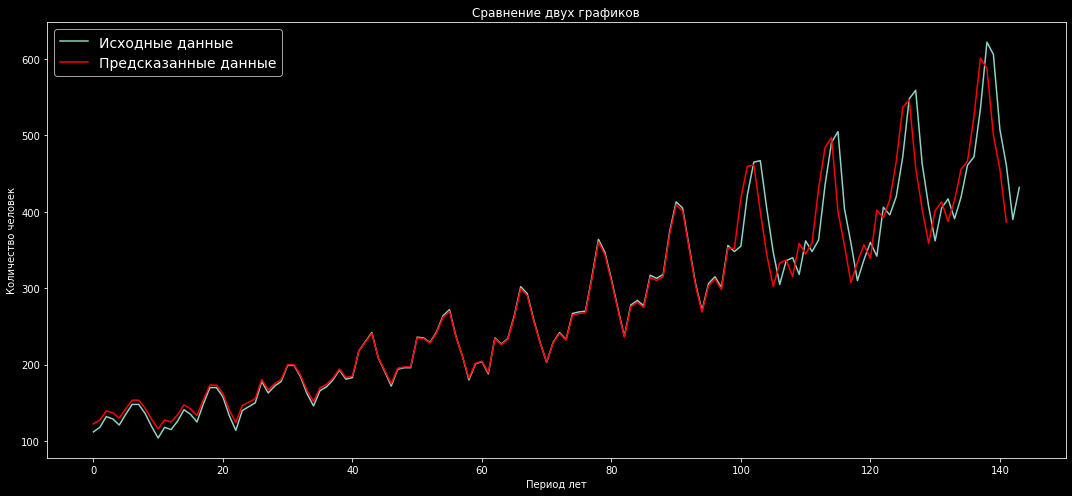

In [87]:
plt.title("Сравнение двух графиков",fontsize='large')
plt.xlabel('Период лет')
plt.ylabel('Количество человек')
plt.plot(scaler.inverse_transform(dataset), label='Исходные данные')
plt.plot(np.vstack([trainPredict,testPredict]),'r',label='Предсказанные данные')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()